In [17]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import random
import matplotlib.pyplot as plt
import numpy as np

In [15]:
sess = tf.InteractiveSession()

In [49]:
def showimg(conv2d_img):
    conv2d_img = np.swapaxes(conv2d_img, 0, 3)
    for i, one_img in enumerate(conv2d_img):
        print(one_img.reshape(3,3))
        plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [20]:
image = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype = np.float32)

In [21]:
print(image.shape)

(1, 3, 3, 1)


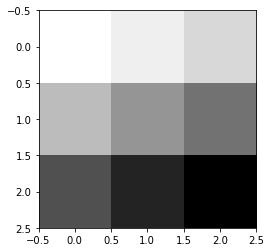

In [24]:
plt.imshow(image.reshape(3,3), cmap='Greys')

In [27]:
# 1 filter 적용 / padding 은 valid 옵션 적용
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


In [28]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


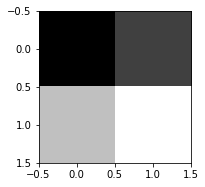

In [31]:
showimg(conv2d_img)

1 fileter (2,2,1,1) / padding:same 으로 진행

In [32]:
print("image.shape", image.shape)

image.shape (1, 3, 3, 1)


In [36]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])

print('weight', weight.shape)

weight (2, 2, 1, 1)


In [37]:
# padding 옵션 'SAME' : 입력의 img 크기와 동일하게 처리. 처리 과정에서 크기 조정이 필요하다면 값을 0으로 채움.
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


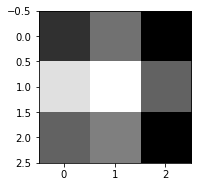

In [40]:
# 시각화
showimg(conv2d_img)

3 filter 사용

In [43]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]]) # 3개의 filter 값 설정 1, 10, -1
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)


In [46]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


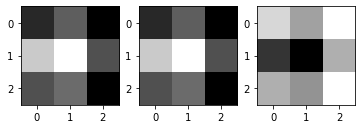

In [48]:
showimg(conv2d_img)

max pooling 적용 : 이미지의 크기를 줄이기 위해 값을 샘플링함.

In [53]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)

pool = tf.nn.max_pool(image, ksize=[1,2,2,1],
                     strides=[1,1,1,1], padding='VALID')
# pool = tf.nn.max_pool(image, ksize=[1,2,2,1],
#                      strides=[1,1,1,1], padding='SAME')

print(pool.shape)
print(pool.eval()) # 이미지 작게 성공

(1, 1, 1, 1)
[[[[4.]]]]


mnist 샘플 적용


In [54]:
# mnist 데이터 불러오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


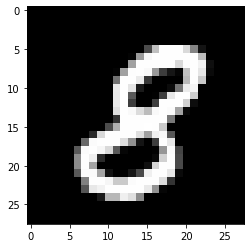

In [67]:
# 임의의 이미지 하나만 가져와서! 
img = mnist.train.images[5].reshape(28,28)
plt.imshow(img, cmap='Greys_r')

In [57]:
sess = tf.InteractiveSession()

D:\AnacondaDev\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


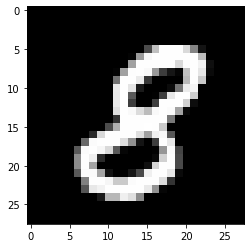

In [69]:
img = mnist.train.images[5].reshape(28,28)
plt.imshow(img, cmap='Greys_r')

28* 28 이어도 이미지에느 큰 변화가 없다.

In [70]:
sess = tf.InteractiveSession()

D:\AnacondaDev\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [71]:
img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))

In [72]:
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)

Tensor("Conv2D_6:0", shape=(1, 14, 14, 5), dtype=float32)


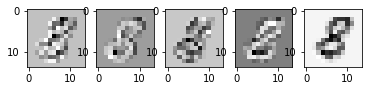

In [73]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
# filter가 5개니까 5개의 출력
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap="Greys_r")

maxpool 적용

Tensor("MaxPool_10:0", shape=(1, 7, 7, 5), dtype=float32)


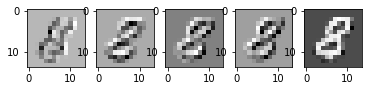

In [78]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')                     
print(pool)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
# filter가 5개니까 5개의 출력
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap="Greys_r")

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("/MNIST_data/", one_hot=True)

Extracting /MNIST_data/train-images-idx3-ubyte.gz
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.001
training_epochs = 15
batch_size  = 100

In [14]:
plt.show(X_img )

OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.

In [5]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # image 28* 28* 1 (black & white)
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01)) # wegiht의 마지막으 filter의 갯수 (32 )
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME') # 필터역할 # x_img, weight, stride(? by ?으로 축소할건지) 설정 # padding : 출력 img 크기를 입력 img 크기과 같게 설정
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # pooling 작업 

In [6]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))

L2= tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1],
                   strides=[1,2,2,1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7*7*64])

In [7]:
W3 = tf.get_variable("W3", shape=[7*7*64, 10],
                    initializer= tf.keras.initializers.glorot_normal())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
print('Learning started. It takes sometimes')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c/ total_batch
        
    print('Epoch:', '%04d' % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished-----------------')        

Learning started. It takes sometimes
Epoch: 0001 cost = 0.394430985
Epoch: 0002 cost = 0.093860581
Epoch: 0003 cost = 0.070046442
Epoch: 0004 cost = 0.057324191
Epoch: 0005 cost = 0.049833934
Epoch: 0006 cost = 0.041896239
Epoch: 0007 cost = 0.036700010
Epoch: 0008 cost = 0.032253546
Epoch: 0009 cost = 0.028563148
Epoch: 0010 cost = 0.024898673
Epoch: 0011 cost = 0.021672534
Epoch: 0012 cost = 0.019255189
Epoch: 0013 cost = 0.017106848
Epoch: 0014 cost = 0.014630534
Epoch: 0015 cost = 0.013454414
Learning Finished-----------------


In [11]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9885


`98.85%` 의 높은 정확도를 보인다.

In [12]:
r = random.randint(0, mnist.test.num_examples -1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(
                            tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r+1]}))

Label:  [4]
Prediction:  [4]
